# Numerical Methods Week 2: Runge-Kutta Method
### written by Ernesto Barraza (UC Irvine), edited by Hannah Hasson (U Rochester) and Shailaja Humane (U of Michigan)

Reminder: [Code of conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=sharing)



---

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as plticker
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
import random



Welcome to the second lesson of Part 2: Numerical Methods. The second algorithm we are going to tackle is one of the most widely-used and accurate ones for solving physical problems with ordinary differential equations (ODEs). Remember that ODEs are just equations whose derivative is also a function of the variable that we are taking the derivative of. That word-salad we just said translates to an expression like:

 $$\begin{align}
R'(t) = f(t,R(t))
 \end{align}$$


Here are the goals of today's lesson

##**Goals**:


*   Abstraction: Use code flow diagrams to understand algorithms
*   Discretize ordinary differential equations (ODEs)
*   Learn the Runge-Kutta algorithm
*   Solve the systems of ODEs from previous lesson with Runge-Kutta and compare the accuracy of the solution



#**The Runge-Kutta Method**

Most if not all numerical analysis and algorithms are based of Euler's method. Once you have understood the intricacies of Euler's method all other more useful algorithms are easy to understand.

The next step up is the [**Runge-Kutta (RK) algorithm.**](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

<br>

This algorithm is so powerful, useful, and versatile that **there are still modern research papers being published using the RK algorithm**. Just looking on google scholar, typing in *Runge-Kutta* brings up a total of 21,500 published and pre-published papers since 2018.

<br>

**More Videos on explaining RK Method**

https://youtu.be/JySrVHRmqfU

https://youtu.be/wIiCaSzMJFw

Give these a watch for additional explanations after the lesson!

<br>

This method will resemble the Euler Method in many ways: again, we are discretizing the steps in time (or space or whatever the dependant variable is) as we evolve the equation(s). That means that we will once again have the format of writing our future value as $x_{i+1}  = x_i  +  ❓  $. The big difference is that now we are going to be more detailed about what goes in place of the ❓.

<br>

**So let's get started**

##**RK2: 2nd-order Runge-Kutta**

We will write our own RK2 method, as it is the simplest version of Runge-Kutta.

For the RK method we again start with a function $f(t,y)$ that evolves as an ordinary differential equation:

   $$\begin{align}
\frac{d y}{dt} = f(t,y) \:\:\: , \:\: y(t_0)=y_0
\tag{1a}\end{align}$$

We can discretize and solve for future **$y$** as follows:

$$\begin{align}
y_{n+1} = y_n + \Delta t \sum^s_{i=1} b_ik_i
 \tag{1b}\end{align}$$


This looks a lot like what we did for Euler's method, but now we are multiplying the time step by a *sum of derivatives* instead of the derivative at one point.

<br>

Where $s$ is the order of RK we are using (for now 2) and

$$\begin{align}
k_1 &= f(t_n,y_n)\\
k_2 &= f(t_n + c_2 \Delta t\:,\: y_n +\Delta t\cdot(a_{21} k_1))
\tag{1c}\end{align}$$

$$
\begin{align}
\cdot
\end{align}
$$
$$
\begin{align}
\cdot
\end{align}
$$
$$
\begin{align}
\cdot
\end{align}
$$

The constants $c_i$, $b_i$, and $a_{i,j}$ are calculated from the [**Butcher Table**](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Explicit_Runge.E2.80.93Kutta_methods):


<p align="center">
  <img width="400" src="https://www.johndcook.com/erk_general_tableau.svg">

</p>

Ew! An ugly matrix of ugly numbers!

Don't fret. Let's figure out what all our variables are with an example.


##**1D Mass on a Spring Example**

We look again to the [1D mass on a spring](https://thumbs.gfycat.com/DeliciousAromaticKoalabear-max-1mb.gif) problem that we solved in the last lesson.

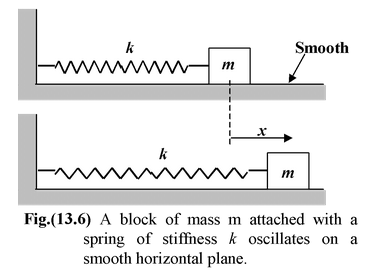

The equations for a mass on a spring are:

$$\begin{align}
F = -k\: (x - x_{eq})
\tag{2}
\end{align}$$

We know that force is just mass multiplied by acceleration and that acceleration is just the derivative of velocity or second derivative of position:

 $$\begin{align}
  m\:a = -k\,(x- x_{eq}) \\
  ⇒\frac{d^2 x}{dt^2} =\frac{d v}{dt}= -\frac{k}{m}(x- x_{eq}).\tag{3}
\end{align}$$


 First, we notice that the $y$ in (1b) is just simply our velocity $v$ so that we can rewrite (3) as:

   $$\begin{align}
\frac{d v}{dt} = f(t,v) = -\frac{k}{m}\: (x - x_{eq}), \,\,\:\: v(t_0)=v_0
\tag{4a}\end{align}$$

<br>

We also know our basic differential equation for position according to Newton's laws:

<br>

$$\begin{align}
\frac{d x}{dt} = v(t), \,\,\:\: x(t_0)=x_0
\tag{4b}\end{align}$$


Next, we said we are going to use RK2 (second order) so that our sum only goes to $s=2$.

More specifically, we will using [**Heun's method**](https://en.wikipedia.org/wiki/Heun%27s_method) (also known as "modified Euler's method").

Heun's method tells us that we set our constants as the following:

$$\begin{align}
b_1 = b_2 = 1/2\,,\\
c_2 = 1 \:\: , \:\: a_{21} = 1
\end{align}$$


So then (1b) becomes:

$$\begin{align}
v_{i+1} = v_i + \Delta t \cdot \frac{\left(k_1 + k_2 \right)}{2}
 \tag{5}\end{align}$$


and we get $k_1$ and $k_2$ formulae for our velocity from (1c):

$$\begin{align}
k_1 &= f(t_i,v_i)\\
k_2 &= f(t_i + \Delta t\:,\: v_i +\Delta t\cdot k_1)
\tag{6}\end{align}$$

<br>

Thus, for $k_1$ we substitute our current time and current velocity into the velocity derivative formula (Eq. 4). For $k_2$ we substitute in our next time, and our next predicted velocity:

$$\begin{align}
k_1 &= -\frac{k}{m}\: (x_i - x_{eq})\\
k_2 &= -\frac{k}{m}\: (x_{t_i+\Delta t}^* - x_{eq})
\tag{7}\end{align}$$




For this problem, there is no velocity in the equation for mass on a spring, so $k_2$ does not look too different (we will tackle this problem in the next project). Remember, Equations 7 are specific to this problem. Equations 6 are general.

We will simplify $x_{t_i+\Delta t}$ and call it $x*$

$$\begin{align}
x_{t_i+\Delta t}^* &= x_i + \Delta t \cdot v_i \\
 &= x*
\end{align}$$

*Notice* this looks like our Euler equations from last week! We'll also need the same Euler estimation of velocity $v*$ to solve for our new $x_{x+1}$

$$\begin{align}
v* &= v_i + \Delta t \cdot f(t_i,v_i)\\
&=  v_i + \Delta t \cdot k_1
\end{align}$$

$$\begin{align}
x_{i+1}^* = x_i + \Delta t \cdot \frac{\left(v_i + v* \right)}{2}
\end{align}$$

<br>
<br>

**That's it! Lets collect all the equations for RK2 we need in one place:**


$$\begin{align}
k_1 &= f(t_i,v_i)\\
x* &= x_i + \Delta t \cdot v_i \\
v* &= v_i + \Delta t \cdot k_1\\
k_2 &= f(t_i + \Delta t\:,\: v*) \\
\tag{8a}\end{align}$$

And to calculate the next position and velocity

$$\begin{align}
x_{i+1} &= x_i + \Delta t \cdot \frac{\left(v_i + v* \right)}{2} \\
v_{i+1} &= v_i + \Delta t \cdot \frac{\left(k_1 + k_2 \right)}{2}
\tag{8b}\end{align}$$

Notice that the format of these equations (8b) is similar to Euler's method (x* and v*). This gives a good sense for what RK2 is doing -- its calculating a new position and velocity using the old value, the time step, and an **averaged** slope. This averaged slope gives a more accurate solution than just Euler's equation.

## **Review of the General RK2 Steps**

Here are the steps for using the RK2 to solve problems:



1.   Enter main loop
2.   Calculate $k_1$ (Equation 8a)
3.   Calculate $k_2$ using $x*$ and $v*$ (Equation 8a)
4.   Update position ($x_{i+1}$) and velocity ($v_{i+1}$) using RK2 and $k_1$ and $k_2$ (Equation 8b)







## Last Notes and Intuition on RK2

Two things to notice:



1.   An RK1 algorithm (1st order) is just Euler's method
2.   Equation (8b) shows us that the RK2 method for new position is just the current position plus the average between the current and future velocity. Similarly, the new velocity is just the current velocity plus the average between the current and future acceleration dv/dt.

The $k_2$ term is call the **predictor** term. It is trying to predict what the future value is. This predicted term is then averaged by the current value, the **corrector**.The final Thus the RK method (2nd order and higher) are in a family of predictor-corrector algorithms which improve upon the accuracy of Euler's method.

Below is an image to visualize what the RK2 method is doing

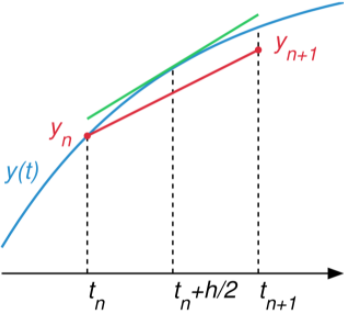

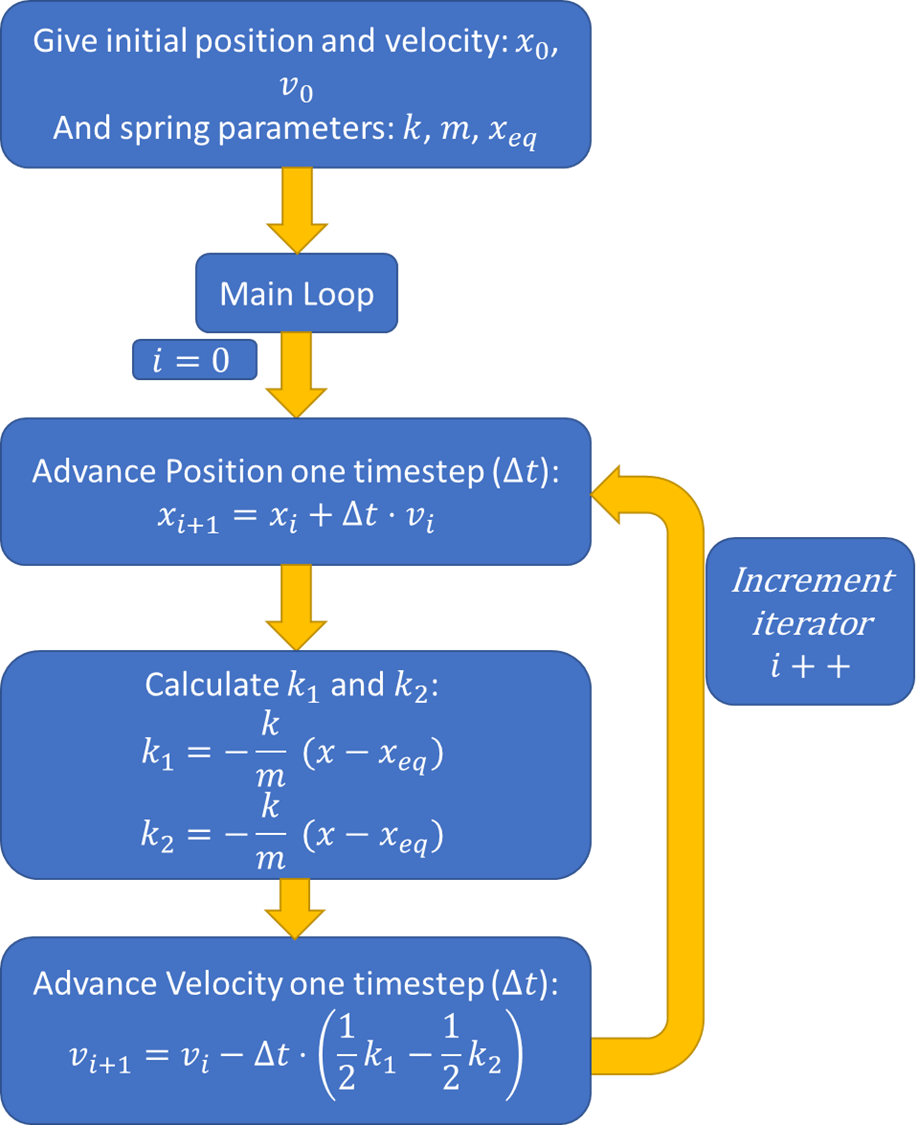

# **Project 1: RK2 method to solve Mass on a Spring**


 ## 1a: Make a Code flow diagram for the RK2 algorithm to solve a mass on a spring

#1b: Write a function that uses the RK2 method to solve the equations of motion for mass on a spring

In [119]:
#Define Runge-Kutta 2nd order function
def RK2(x0,v0,totaltime,dt,xeq,k,m):
  """
  Returns: calculated (by Runge-Kutta 2nd Order Method) velocity and the calculated
  (by Euler's method) position of a particle as arrays

  This function should use RK2 method to solve the Spring Force Equations
  given an initial velocity (v0) and spring constants (k) and mass (m)
  This function returns the position (x) calculated via Euler's method
  and velocity (v) via RK2 method over time  as an array for each

  Parameter x0: initial position in the x-direction
  Parameter v0: initial velocity in the x-direction
  Parameter totaltime: total real time (s) to run the simulation
  Parameter dt: time step (s)
  Parameter xeq: equilibrium position of spring (m)
  Parameter k: spring force constant (N/m)
  Parameter m: mass on spring (Kg)

  """
  #total number of time steps
  nsteps = int(totaltime/dt)
  #create arrays to store position and velocity
  x = np.zeros(nsteps)
  v = np.zeros(nsteps)

  # TODO: initialize arrays with x0 and v0
  x[0] = x0
  v[0] = v0

  for i in range(nsteps-1):
    # calculate k1
    k1 = -k/m * (x[i] - xeq)

    # x star
    xstar = x[i] + dt * v[i]

    # calculate k2
    k2 = -k/m * (xstar - xeq)

    # v star
    vstar = v[i] + dt * k1

    # advance position 1 time step
    x[i+1] = x[i] + dt * 0.5 * (vstar + v[i])

    # advance velocity 1 time step
    v[i+1] = v[i] + dt * 0.5 * (k1 + k2)


  return[x,v]

Plot

In [120]:
#constants
k = 1.0 #Spring Constant (N/m)
m = 1.0 #mass (kg)
xeq = 1.0 #Spring Equilibrium length (m)

#total number of real seconds to simulate
totaltime = 100 #seconds

#time step in seconds
dt = 0.1

#initial conditions
x0 = 6.0
v0 = 0.0

#use RK2
[x,v] = RK2(x0,v0,totaltime,dt,xeq,k,m)


In [121]:
ttime = np.arange(0, totaltime,dt)
harmonic = xeq+(x0-xeq) * np.cos(np.sqrt(k/m)*ttime)
t = totaltime
fig,ax = plt.subplots()
ax.plot(ttime[:t], x[:t], label = 'RK2', marker = "x")
ax.plot(ttime[:t], harmonic[:t], label = 'Analytical')
plt.legend()
plt.xlabel("time [s]")
plt.ylabel("postion [m]")
# ax.set_aspect(2.0)
plt.show()

##Answer

&nbsp;
&nbsp;
-------
#**PAUSE HERE AND TAKE A BREAK!**
-------

&nbsp;

#**Using RK with Forces that Depend on Velocity**

The power of RK is that it incorporates and predicts velocity terms.

We will now look at [**damped harmonic oscillators**](http://hyperphysics.phy-astr.gsu.edu/hbase/oscda.html). This is when there is a force (like friction) that fights against the motion of the oscillator and slows it down.



Our damped oscillator equations are:

$$\begin{align}
F = -k\: ( x - x_{eq}) + \beta v
\tag{8}
\end{align}$$

<br>

$$\begin{align}
\frac{d v}{dt} = -\frac{k}{m}\: ( x - x_{eq}) + \frac{\beta}{m} v
\tag{9}
\end{align}$$

<br>

Where $\beta$ is our drag term. Note that it has the opposite sign of the force for the spring because it pushes against it.

##Project 2: Write a RK2 algorithm for a damped harmonic oscillator

Make a code flow diagram!

In [122]:
#Define Runge-Kutta 2nd order function
def RK2Damped(x0,v0,totaltime,dt,xeq,k,b,m):

  """
  Returns: calculated (by Runge-Kutta 2nd Order Method) velocity and the calculated
  (by Euler's method) position of a particle as arrays

  This function should use RK2 method to solve the Spring Force Equations
  given an initial velocity (v0) and spring constants (k) and mass (m)
  This function returns the position (x) calculated via Euler's method
  and velocity (v) via RK2 method over time  as an array for each

  Parameter x0: initial position in the x-direction
  Parameter v0: initial velocity in the x-direction
  Parameter totaltime: total real time (s) to run the simulation
  Parameter dt: time step (s)
  Parameter xeq: equilibrium position of spring (m)
  Parameter k: spring force constant (N/m)
  Parameter b: drag constant (N s/m)
  Parameter m: mass on spring (Kg)

  """
  #total number of time steps
  nsteps = int(totaltime/dt)
  #create arrays to store position and velocity
  x = np.zeros(nsteps)
  v = np.zeros(nsteps)

  # TODO: initialize arrays with x0 and v0
  x[0] = x0
  v[0] = v0

  for i in range(nsteps-1):
    # calculate k1
    k1 = -k/m * (x[i] - xeq) + b/m * v[i]

    # x star
    xstar = x[i] + dt * v[i]

    # v star
    vstar = v[i] + dt * k1

    # calculate k2
    k2 = -k/m * (xstar - xeq) + b/m * vstar

    # advance position 1 time step
    x[i+1] = x[i] + dt * 0.5 * (vstar + v[i])

    # advance velocity 1 time step
    v[i+1] = v[i] + dt * 0.5 * (k1 + k2)


  return[x,v]

Plots

In [123]:
#constants
k = 1.0 #Spring Constant (N/m)
#c2 - 4mk
b = -0.25 #drag constant (N s/m)
m = 1.0 #mass (kg)
xeq = 1.0 #Spring Equilibrium length (m)

#total number of real seconds to simulate
totaltime = 100 #seconds

#time step in seconds
dt = 0.001

#initial conditions
x0 = 6.0
v0 = 0.0

#use RK2
[x,v] = RK2Damped(x0,v0,totaltime,dt,xeq,k,b,m)

In [124]:
ttime = np.arange(0, totaltime,dt)
harmonic = xeq+(x0-xeq)*np.exp(b/2/m*ttime) * np.cos(np.sqrt(k/m)*ttime)
t = int(np.floor(50/dt))
fig,ax = plt.subplots()
ax.plot(ttime[:t], x[:t], label = 'RK2', linestyle = "dashed")
ax.plot(ttime[:t], harmonic[:t], label = 'Analytical')
plt.legend()
plt.xlabel("time [s]")
plt.ylabel("postion [m]")
#ax.set_aspect(2.0)
plt.show()


# **RK2 for a Driven and Damped Oscillator**


Now we are going to add one more term to increase the complexity of our system: we will drive the oscillator. This means that we will be pushing it to oscillate with some frequency we pick.

<br>

Our driven-damped oscillator equation is now:

$$\begin{align}
F = -k\: ( x - x_{eq}) + \beta v + A\: cos(\omega t)
\tag{8}
\end{align}$$

<br>

$$\begin{align}
\frac{d v}{dt} = -\frac{k}{m}\: ( x - x_{eq}) + \frac{\beta}{m} v + \frac{A}{m}\: cos(\omega t)
\tag{9}
\end{align}$$

<br>

Where '$\beta$' is our drag term, and '$A\:cos(\omega t)$' is an oscillating driving force with amplitude '$A$' and frequency '$\omega$'.

##Project 3: Use RK2 to solve driven-damped oscillator

Write a code-flow diagram

In [125]:
#Define Runge-Kutta 2nd order function
def RK2Forced(x0,v0,totaltime,dt,xeq,k,b,m, w,A):
  """
  Returns: calculated (by Runge-Kutta 2nd Order Method) velocity and the calculated
  (by Euler's method) position of a particle as arrays

  This function should use RK2 method to solve the Spring Force Equations
  given an initial velocity (v0) and spring constants (k) and mass (m)
  This function returns the position (x) calculated via Euler's method
  and velocity (v) via RK2 method over time  as an array for each

  Parameter x0: initial position in the x-direction
  Parameter v0: initial velocity in the x-direction
  Parameter totaltime: total real time (s) to run the simulation
  Parameter dt: time step (s)
  Parameter xeq: equilibrium position of spring (m)
  Parameter k: spring force constant (N/m)
  Parameter b: drag constant (N s/m)
  Parameter m: mass on spring (Kg)
  Parameter w: frequency of forced oscillation
  Parameter A: amplitude of forced oscillation

  """

  #total number of time steps
  totalsteps = int(totaltime/dt)
  #create arrays to store position and velocity
  x = np.zeros(totalsteps)
  v = np.zeros(totalsteps)

  #set initial positions and velocities
  x[0]= x0
  v[0]= v0

  #for loop begins at i=0
  for i in range(totalsteps-1):
    # TODO: write your function out here using the parameters above
    # calculate k1
    k1 = -k/m * (x[i] - xeq) + b/m * v[i] + A/m * np.cos(w * dt * i)

    # x star
    xstar = x[i] + dt * v[i]

    # v star
    vstar = v[i] + dt * k1

    # calculate k2
    k2 = -k/m * (xstar - xeq) + b/m * vstar + A/m * np.cos(w * dt * (i + 1))

    # advance position 1 time step
    x[i+1] = x[i] + dt * 0.5 * (vstar + v[i])

    # advance velocity 1 time step
    v[i+1] = v[i] + dt * 0.5 * (k1 + k2)

  return [x,v]

Plots

In [126]:
#constants
k = 1.0 #Spring Constant (N/m)
#c2 - 4mk
b = -0.25 #drag constant (N s/m)
m = 1.0 #mass (kg)
xeq = 1.0 #Spring Equilibrium length (m)
A = 0.5
w = 2

#total number of real seconds to simulate
totaltime = 100 #seconds

#time step in seconds
dt = 0.1

#initial conditions
x0 = 2.0
v0 = 0.0

#use RK2
[x,v] =RK2Forced(x0,v0,totaltime,dt,xeq,k,b,m, w,A)

In [127]:
ttime = np.arange(0, totaltime,dt)
gamma = -b/(2*m)
w0 = np.sqrt(k/m)
w1 = np.sqrt(w0**2 - gamma**2)
phi = np.arctan((-b*w)/(k-m*(w**2)))
amp = (A/m)/np.sqrt((w0**2 - w**2)**2 + 4*(gamma**2)*w**2)
phi1 = np.arctan((amp*w*np.sin(np.pi - phi) - gamma*(x0 - xeq - amp*np.cos(np.pi - phi)) - v0)/(w1*(x0 - xeq - amp*np.cos(np.pi - phi))))
amp1 = (x0 - xeq - amp*np.cos(np.pi - phi))/np.cos(phi1)
harmonic = xeq + amp1*np.exp(-gamma*ttime) * np.cos(w1*ttime + phi1) + amp* np.cos(w*ttime + np.pi - phi)
t = 500
fig,ax = plt.subplots()
ax.plot(ttime[:t], x[:t], label = 'RK2', marker = "x")
ax.plot(ttime[:t], harmonic[:t], label = 'Analytical')
plt.legend()
plt.xlabel("time [s]")
plt.ylabel("postion [m]")
#ax.set_aspect(2.0)
plt.show()